# Uber_Weather_Data

In [89]:

# Import libraries_testing
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
import warnings
warnings.filterwarnings('ignore')


# 2014 UberData -file paths & read csv

# Path to 2014 Uber CSV file 
Uber_trips_apr14 = Path("Raw_Data/uber-raw-data-apr14.csv")
Uber_trips_may14 = Path("Raw_Data/uber-raw-data-may14.csv")
Uber_trips_jun14 = Path("Raw_Data/uber-raw-data-jun14.csv")
Uber_trips_jul14 = Path("Raw_Data/uber-raw-data-jul14.csv")
Uber_trips_aug14 = Path("Raw_Data/uber-raw-data-aug14.csv")
Uber_trips_sep14 = Path("Raw_Data/uber-raw-data-sep14.csv")


# Read all Uber CSV file into DataFrame
df_apr14 = pd.read_csv(Uber_trips_apr14)
df_may14 = pd.read_csv(Uber_trips_may14)
df_jun14 = pd.read_csv(Uber_trips_jun14)
df_jul14 = pd.read_csv(Uber_trips_jul14)
df_aug14 = pd.read_csv(Uber_trips_aug14)
df_sep14 = pd.read_csv(Uber_trips_sep14)

# check uber dataaframe structure using one csv file
df_apr14.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
# 2014 Weather data -file paths & read csv - Use merged CSV file 

# Path to 2014 weather CSV file

NOAA_Meged_weather_2014 = Path("Raw_Data/NOAA_NewYork_Apr_Sep_2014.csv")

# Read all weather CSV file into DataFrame
Weather_df = pd.read_csv(NOAA_Meged_weather_2014)

# check uber dataaframe structure
Weather_df.head()

,Year,Month,Day,MaxTemp_(degF),MinTemp_(degF),Rain_MeltedSnow_Etc_(in),Snow_IcePellets_Hail_(in),Snow_IcePellets_Hail_IceOnGround_(in)
0,2014,4,1,60,39,0.00,0,0
1,2014,4,2,54,42,0.00,0,0
2,2014,4,3,67,46,0.07,0,0
3,2014,4,4,47,40,0.21,0,0
4,2014,4,5,54,40,0.00,0,0


# Cleaning Uber data: Concatenate, Check missing value, Duplicates and remove if any.

In [5]:
# Concatenate all Uber data DataFrames into one

Uber_combined_df = pd.concat([df_apr14, df_may14, df_jun14, df_jul14, df_aug14, df_sep14], ignore_index=True)

Uber_combined_df.head()


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [6]:
# check the tail of the data to makesure concaternation worked
Uber_combined_df.tail()

,Date/Time,Lat,Lon,Base
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764
4534326,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [7]:
# Count the number of rows in Uber_combined_df
num_rows = len(Uber_combined_df)
print("Number of rows in Uber_combined_df:", num_rows)

Number of rows in Uber_combined_df: 4534327


In [8]:
# Check for missing Uber data
missing_data = Uber_combined_df.isnull()

# Summarize missing data counts
missing_counts = missing_data.sum()

# Print
print("Missing data counts:")
print(missing_counts)

Missing data counts:
Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


In [9]:
# Check for duplicates in Uber data
duplicates = Uber_combined_df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print or use num_duplicates as needed
print("Number of duplicate rows in Uber_combined_df:", num_duplicates)


Number of duplicate rows in Uber_combined_df: 82581


In [10]:
# Remove duplicates

Uber_combined_cleaned_df = Uber_combined_df.drop_duplicates()

# Print the shape to see how many rows are left after removing duplicates
print("Shape of cleaned DataFrame:", Uber_combined_cleaned_df.shape)




Shape of cleaned DataFrame: (4451746, 4)


In [11]:
Uber_combined_cleaned_df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# Cleaning and formating the Weather data

In [14]:
Weather_df.head()

,Year,Month,Day,MaxTemp_(degF),MinTemp_(degF),Rain_MeltedSnow_Etc_(in),Snow_IcePellets_Hail_(in),Snow_IcePellets_Hail_IceOnGround_(in)
0,2014,4,1,60,39,0.00,0,0
1,2014,4,2,54,42,0.00,0,0
2,2014,4,3,67,46,0.07,0,0
3,2014,4,4,47,40,0.21,0,0
4,2014,4,5,54,40,0.00,0,0


In [12]:
# Check for missing data
missing_data = Weather_df.isnull()

# Summarize missing data counts
missing_counts = missing_data.sum()

# Print or use missing_counts as needed
print("Missing data counts:")
print(missing_counts)

Missing data counts:
Year                                     0
Month                                    0
Day                                      0
MaxTemp_(degF)                           0
MinTemp_(degF)                           0
Rain_MeltedSnow_Etc_(in)                 0
Snow_IcePellets_Hail_(in)                0
Snow_IcePellets_Hail_IceOnGround_(in)    0
dtype: int64


In [13]:
# Convert MaxTemp_(degF) and MinTemp_(degF) columns to Celsius and round to 2 decimal places
Weather_df['MaxTemp_(degC)'] = ((Weather_df['MaxTemp_(degF)'] - 32) * 5.0/9.0).round(2)
Weather_df['MinTemp_(degC)'] = ((Weather_df['MinTemp_(degF)'] - 32) * 5.0/9.0).round(2)

# Create a Date column from year, month, and day columns to match  Uber data. This step is done to merge two dataframe  
Weather_df['Date'] = pd.to_datetime(Weather_df[['Year', 'Month', 'Day']]).dt.strftime('%-d/%-m/%Y')

Weather_df.head()


,Year,Month,Day,MaxTemp_(degF),MinTemp_(degF),Rain_MeltedSnow_Etc_(in),Snow_IcePellets_Hail_(in),Snow_IcePellets_Hail_IceOnGround_(in),MaxTemp_(degC),MinTemp_(degC),Date
0,2014,4,1,60,39,0.00,0,0,15.56,3.89,1/4/2014
1,2014,4,2,54,42,0.00,0,0,12.22,5.56,2/4/2014
2,2014,4,3,67,46,0.07,0,0,19.44,7.78,3/4/2014
3,2014,4,4,47,40,0.21,0,0,8.33,4.44,4/4/2014
4,2014,4,5,54,40,0.00,0,0,12.22,4.44,5/4/2014


# Merge both Uber and Weather data 

In [14]:
# Convert the 'Date/Time' column to datetime format
Uber_combined_cleaned_df['Date/Time'] = pd.to_datetime(Uber_combined_cleaned_df['Date/Time'], format='%m/%d/%Y %H:%M:%S')

# Extract the date part from the 'Date/Time' column
Uber_combined_cleaned_df['Date'] = Uber_combined_cleaned_df['Date/Time'].dt.date

# Convert the 'Date' column back to datetime format to ensure consistency
Uber_combined_cleaned_df['Date'] = pd.to_datetime(Uber_combined_cleaned_df['Date'])


# Convert the 'Date' column in Weather_df to datetime format
Weather_df['Date'] = pd.to_datetime(Weather_df['Date'], format='%d/%m/%Y')

# Merge the Uber data with the Weather data on the 'Date' column
Uber_Weather_merged_data = pd.merge(Uber_combined_cleaned_df, Weather_df, on='Date', how='left')

# Display the first few rows of the merged DataFrame
Uber_Weather_merged_data.head()


,Date/Time,Lat,Lon,Base,Date,Year,Month,Day,MaxTemp_(degF),MinTemp_(degF),Rain_MeltedSnow_Etc_(in),Snow_IcePellets_Hail_(in),Snow_IcePellets_Hail_IceOnGround_(in),MaxTemp_(degC),MinTemp_(degC)
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,2014,4,1,60,39,0.0,0,0,15.56,3.89
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,2014,4,1,60,39,0.0,0,0,15.56,3.89
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,2014,4,1,60,39,0.0,0,0,15.56,3.89
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,2014,4,1,60,39,0.0,0,0,15.56,3.89
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,2014,4,1,60,39,0.0,0,0,15.56,3.89


In [15]:

Uber_Weather_merged_data.tail()

,Date/Time,Lat,Lon,Base,Date,Year,Month,Day,MaxTemp_(degF),MinTemp_(degF),Rain_MeltedSnow_Etc_(in),Snow_IcePellets_Hail_(in),Snow_IcePellets_Hail_IceOnGround_(in),MaxTemp_(degC),MinTemp_(degC)
4451741,2014-09-30 22:57:00,40.7668,-73.9845,B02764,2014-09-30,2014,9,30,71,62,0.0,0,0,21.67,16.67
4451742,2014-09-30 22:57:00,40.6911,-74.1773,B02764,2014-09-30,2014,9,30,71,62,0.0,0,0,21.67,16.67
4451743,2014-09-30 22:58:00,40.8519,-73.9319,B02764,2014-09-30,2014,9,30,71,62,0.0,0,0,21.67,16.67
4451744,2014-09-30 22:58:00,40.7081,-74.0066,B02764,2014-09-30,2014,9,30,71,62,0.0,0,0,21.67,16.67
4451745,2014-09-30 22:58:00,40.7140,-73.9496,B02764,2014-09-30,2014,9,30,71,62,0.0,0,0,21.67,16.67


In [16]:
# Count the number of rows in cross check the number of rows

num_rows = len(Uber_Weather_merged_data)

print("Number of rows in Uber_Weather_merged_data:", num_rows)

Number of rows in Uber_Weather_merged_data: 4451746


# Exploratory Data Analysis (EDA)

In [17]:
# Ride counts - Group by date
daily_rides = Uber_Weather_merged_data.groupby('Date')['Base'].count()
print("Daily Rides:\n", daily_rides)

Daily Rides:
 Date
2014-04-01    14376
2014-04-02    17230
2014-04-03    20482
2014-04-04    26353
2014-04-05    19273
              ...  
2014-09-26    36538
2014-09-27    38424
2014-09-28    28924
2014-09-29    28478
2014-09-30    32593
Name: Base, Length: 183, dtype: int64


In [18]:
# Aggregate ride counts by date
Daily_ride_counts = Uber_combined_cleaned_df.groupby('Date').size().reset_index(name='daily_ride_count')

In [19]:
# Merge ride counts with weather data
daily_merged_ride = pd.merge(Daily_ride_counts,Uber_Weather_merged_data, on='Date')
daily_merged_ride.head()

,Date,daily_ride_count,Date/Time,Lat,Lon,Base,Year,Month,Day,MaxTemp_(degF),MinTemp_(degF),Rain_MeltedSnow_Etc_(in),Snow_IcePellets_Hail_(in),Snow_IcePellets_Hail_IceOnGround_(in),MaxTemp_(degC),MinTemp_(degC)
0,2014-04-01,14376,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014,4,1,60,39,0.0,0,0,15.56,3.89
1,2014-04-01,14376,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014,4,1,60,39,0.0,0,0,15.56,3.89
2,2014-04-01,14376,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014,4,1,60,39,0.0,0,0,15.56,3.89
3,2014-04-01,14376,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014,4,1,60,39,0.0,0,0,15.56,3.89
4,2014-04-01,14376,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014,4,1,60,39,0.0,0,0,15.56,3.89


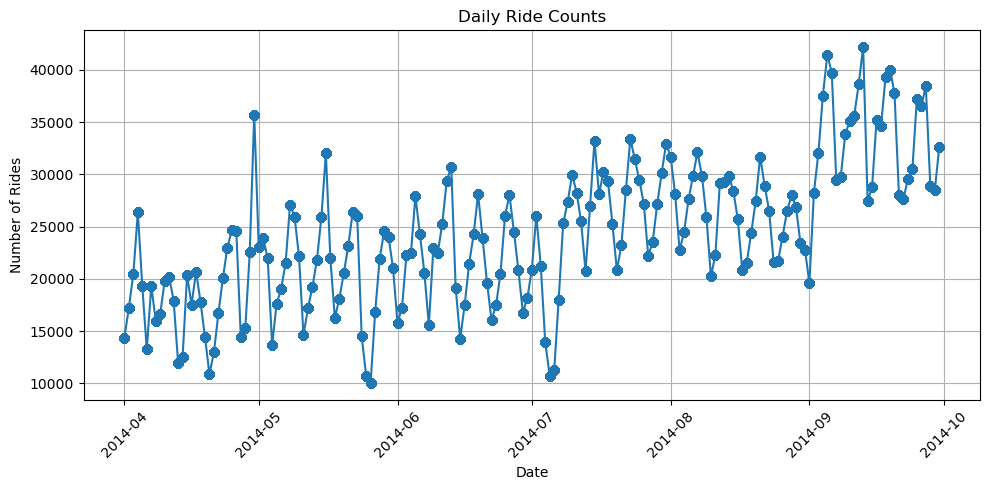

In [20]:
# Plot daily ride counts - 
plt.figure(figsize=(10, 5))
plt.plot(daily_merged_ride['Date'], daily_merged_ride['daily_ride_count'], marker='o')
plt.title('Daily Ride Counts')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate average temperature

daily_merged_ride['AvgTemp'] = (daily_merged_ride['MaxTemp_(degC)'] + daily_merged_ride['MinTemp_(degC)']) / 2

# Time-Based Analysis:

Temperature Impact on Ride Count

*Null Hypothesis (H₀): There is no significant difference in daily ride counts between spring and summer.
*Alternative Hypothesis (H₁): Daily ride counts are higher in summer compared to spring due to warmer temperatures.
    

Analyisis

In [22]:
# Extract month to categorize into seasons- Used chatGTP to derive codes
daily_merged_ride['Month'] = daily_merged_ride['Date'].dt.month

# Categorize into seasons: Spring (April-June), Summer (July-September)
daily_merged_ride['Season'] = 'Spring'
daily_merged_ride.loc[(daily_merged_ride['Month'] >= 7) & (daily_merged_ride['Month'] <= 9), 'Season'] = 'Summer'

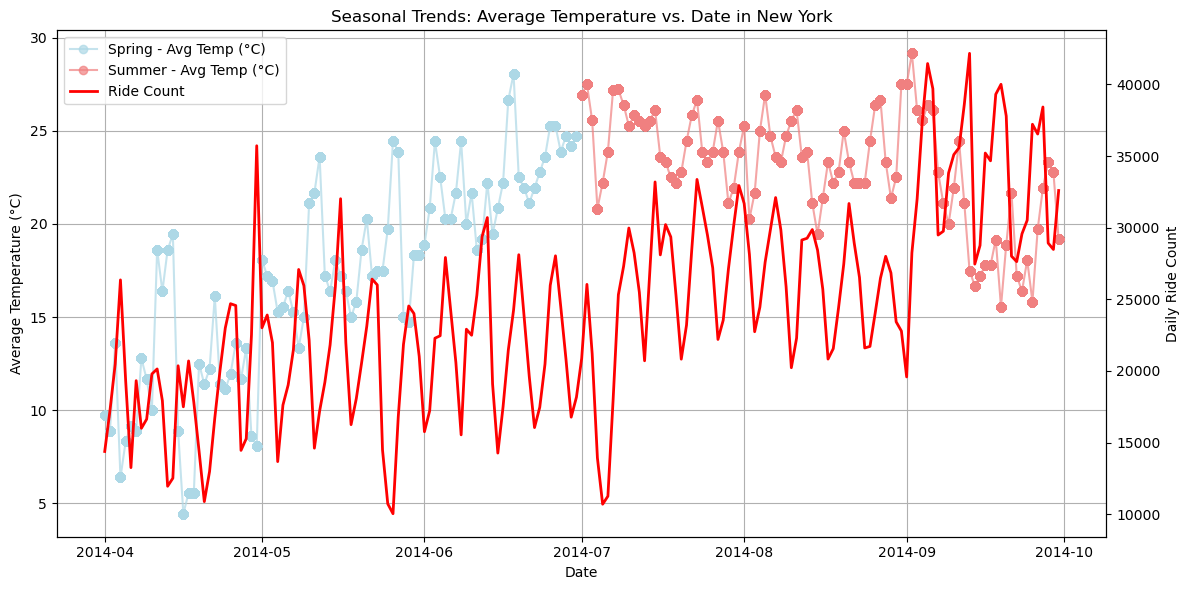

In [84]:

# Plotting seasonal trends with ride count
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average temperature with light shades
for season, group in daily_merged_ride.groupby('Season'):
    if season == 'Spring':
        color = 'lightblue'
    elif season == 'Summer':
        color = 'lightcoral'
    
    ax1.plot(group['Date'], group['AvgTemp'], label=f'{season} - Avg Temp (°C)', marker='o', color=color, alpha=0.7)

ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature (°C)')
ax1.set_title('Seasonal Trends: Average Temperature vs. Date in New York')

# Create a second y-axis for ride count with darker shade
ax2 = ax1.twinx()
ax2.plot(daily_merged_ride['Date'], daily_merged_ride['daily_ride_count'], color='red', label='Ride Count', linewidth=2)

ax2.set_ylabel('Daily Ride Count')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Grid and layout adjustments
ax1.grid(True)
ax2.grid(False)
plt.tight_layout()

plt.show()

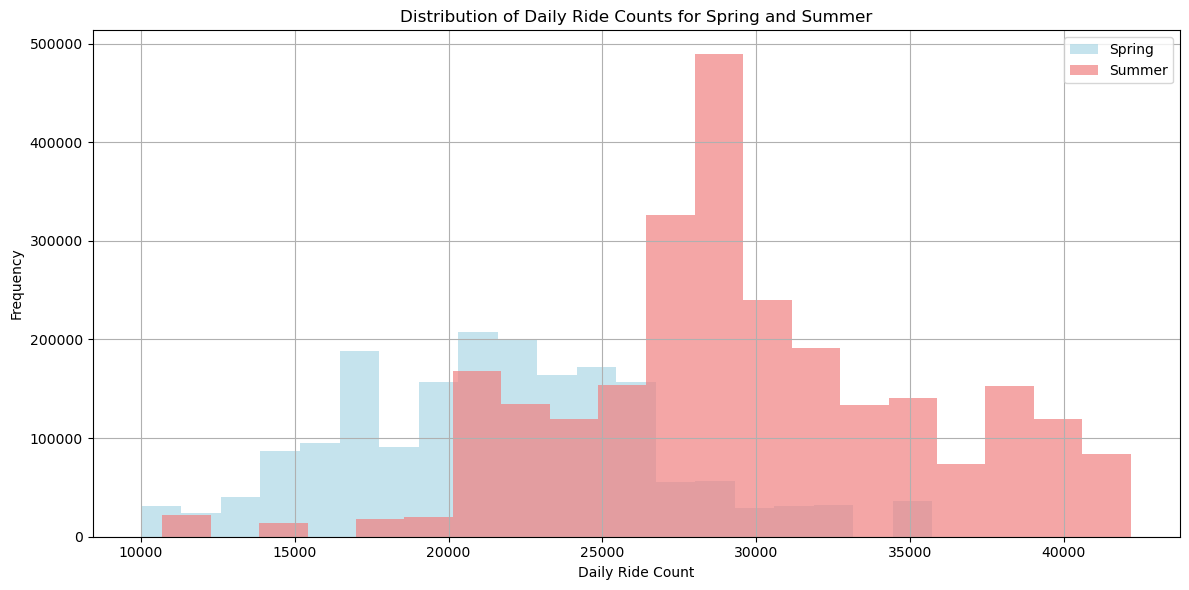

In [87]:
#check distribution of ride in spring and summer 
# Filter data for spring and summer
spring_rides = daily_merged_ride[daily_merged_ride['Season'] == 'Spring']['daily_ride_count']
summer_rides = daily_merged_ride[daily_merged_ride['Season'] == 'Summer']['daily_ride_count']

# Plot histograms
plt.figure(figsize=(12, 6))

plt.hist(spring_rides, bins=20, alpha=0.7, color='lightblue', label='Spring')
plt.hist(summer_rides, bins=20, alpha=0.7, color='lightcoral', label='Summer')

plt.xlabel('Daily Ride Count')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Ride Counts for Spring and Summer')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

Can not use t-test - Data not normally distributed. 

Can we use The Mann-Whitney U test ??

In [88]:
# Perform Mann-Whitney U test- Check whether we can use this test....
statistic, p_value = mannwhitneyu(spring_rides, summer_rides)

print(f"Mann-Whitney U test statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in daily ride counts between spring and summer.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in daily ride counts between spring and summer.")


Mann-Whitney U test statistic: 690787255168.0
P-value: 0.0
Reject the null hypothesis: There is a significant difference in daily ride counts between spring and summer.


# How does the time of day impact Uber ride frequency in different weather conditions?

Null Hypothesis (H₀): There is no significant difference in Uber ride frequency across different times of the day, regardless of weather conditions.
Alternative Hypothesis (H₁): Uber ride frequency varies significantly across different times of the day, influenced by varying weather conditions.

In [ ]:
# Extract the hour from the 'Date/Time' column
daily_merged_ride['hour'] = daily_merged_ride['Date/Time'].dt.hour


In [26]:
#Define time segments:
def assign_time_segment(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to assign time segments
daily_merged_ride['time_segment'] = daily_merged_ride['hour'].apply(assign_time_segment)

In [41]:
# Calculate descriptive statistics
descriptive_stats = daily_merged_ride.groupby('time_segment')['hour'].agg(['count', 'mean', 'std', 'median'])
print(descriptive_stats)

                count       mean       std  median
time_segment                                      
Afternoon     1164747  14.308313  1.390810    14.0
Evening       1216753  18.425255  1.116238    18.0
Morning       1076298   8.223278  1.850830     8.0
Night          993948  15.451138  9.452623    21.0


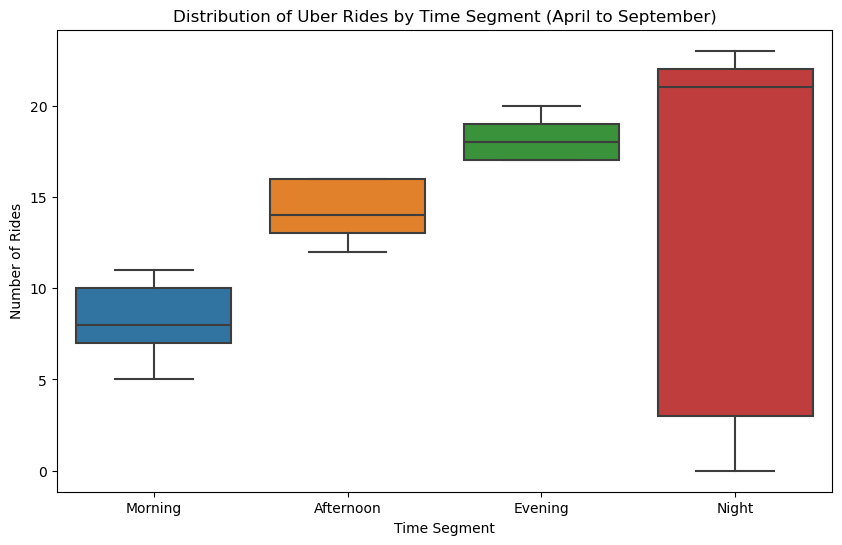

In [90]:

# Group rides by time segment
morning_rides = daily_merged_ride[daily_merged_ride['time_segment'] == 'Morning']['hour']
afternoon_rides = daily_merged_ride[daily_merged_ride['time_segment'] == 'Afternoon']['hour']
evening_rides = daily_merged_ride[daily_merged_ride['time_segment'] == 'Evening']['hour']
night_rides = daily_merged_ride[daily_merged_ride['time_segment'] == 'Night']['hour']

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_segment', y='hour', data=daily_merged_ride, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.xlabel('Time Segment')
plt.ylabel('Number of Rides')
plt.title('Distribution of Uber Rides by Time Segment (April to September)')
plt.show()


In [91]:
# Perform ANOVA
anova_result = f_oneway(morning_rides, afternoon_rides, evening_rides, night_rides)

print(f'ANOVA result: F-statistic={anova_result.statistic}, p-value={anova_result.pvalue}')


ANOVA result: F-statistic=951650.3249048049, p-value=0.0


The small p-value indicates significant differences in Uber ride counts among different time segments of the day. With a p-value close to zero, the statistical analysis strongly rejects the null hypothesis, which assumes that ride counts are equal across all time segments. However, without hourly temperature data, we are unable to assess how weather conditions might specifically influence ride frequency on an hourly basis.

In [59]:
# Group by month and time segment and count rides
rides_by_month_segment = daily_merged_ride.groupby(['month', 'time_segment']).size().reset_index(name='daily_ride_count')

# Display the grouped data
print(rides_by_month_segment)

    month time_segment  daily_ride_count
0       4    Afternoon            144602
1       4      Evening            161436
2       4      Morning            128690
3       4        Night            122039
4       5    Afternoon            175117
5       5      Evening            180685
6       5      Morning            146010
7       5        Night            140548
8       6    Afternoon            175554
9       6      Evening            170932
10      6      Morning            163988
11      6        Night            142684
12      7    Afternoon            203262
13      7      Evening            215512
14      7      Morning            188126
15      7        Night            175069
16      8    Afternoon            206356
17      8      Evening            212740
18      8      Morning            199098
19      8        Night            195199
20      9    Afternoon            259856
21      9      Evening            275448
22      9      Morning            250386
23      9       

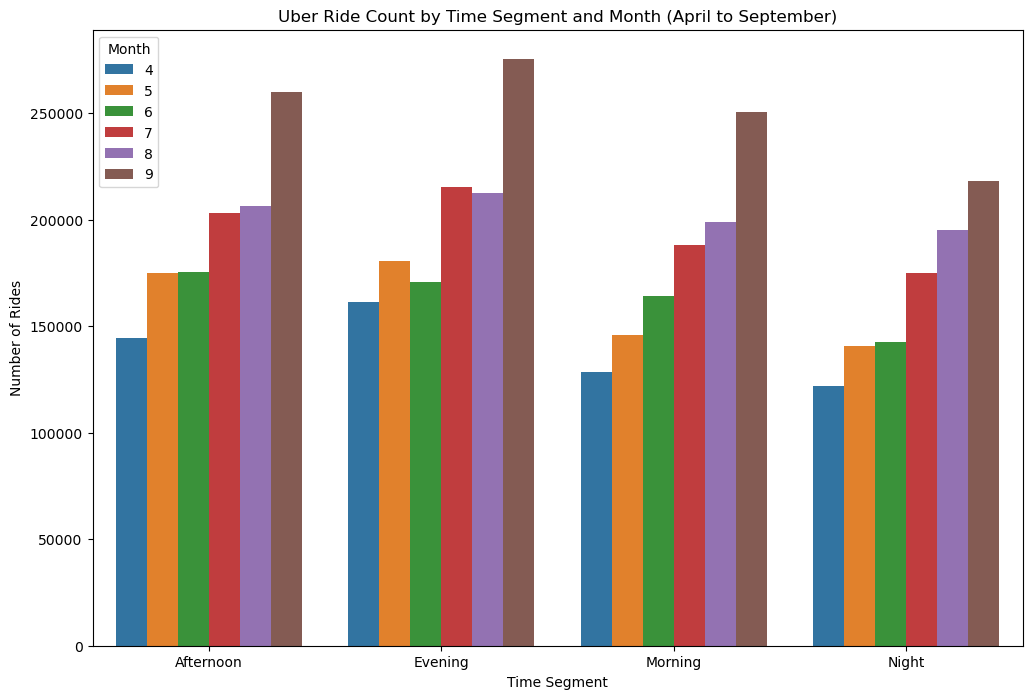

In [75]:
# Group by month and time segment and count rides
rides_by_month_segment = daily_merged_ride.groupby(['month', 'time_segment']).size().reset_index(name='daily_ride_count')



# Bar plot for ride count by time segment and month
plt.figure(figsize=(12, 8))
sns.barplot(x='time_segment', y='daily_ride_count', hue='month', data=rides_by_month_segment, hue_order=[4, 5, 6, 7, 8, 9])
plt.xlabel('Time Segment')
plt.ylabel('Number of Rides')
plt.title('Uber Ride Count by Time Segment and Month (April to September)')
plt.legend(title='Month')
plt.show()